
___
# Decision Trees


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.shape

(81, 4)

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

## EDA

We'll just check out a simple pairplot for this small dataset.

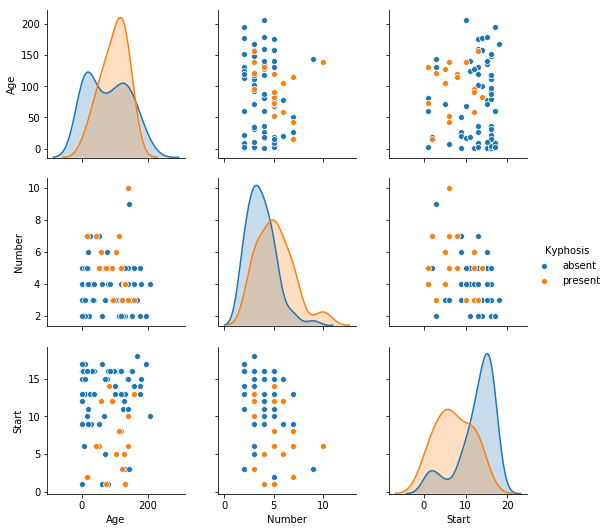

In [7]:
sns.pairplot(df,hue='Kyphosis')

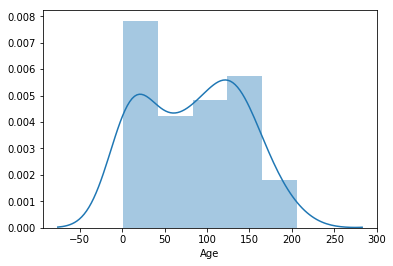

In [8]:
sns.distplot(df["Age"])

## Train Test Split

Let's split up the data into a training set and a test set!

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [11]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [12]:
y


0      absent
1      absent
2     present
3      absent
4      absent
5      absent
6      absent
7      absent
8      absent
9     present
10    present
11     absent
12     absent
13     absent
14     absent
15     absent
16     absent
17     absent
18     absent
19     absent
20     absent
21    present
22    present
23     absent
24    present
25     absent
26     absent
27     absent
28     absent
29     absent
       ...   
51     absent
52    present
53     absent
54     absent
55     absent
56     absent
57    present
58     absent
59     absent
60    present
61    present
62     absent
63     absent
64     absent
65     absent
66     absent
67     absent
68     absent
69     absent
70     absent
71     absent
72     absent
73     absent
74     absent
75     absent
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,  random_state = 110)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80,  random_state = 11)
print(len(X_train))
print(len(X_test))
#train_size

56
25


In [17]:
X_test

,Age,Number,Start
19,27,4,9
30,31,3,16
33,112,3,16
52,139,10,6
36,1,3,9
59,102,3,13
68,18,4,11
44,97,3,16
64,118,4,16
16,78,6,15


## Decision Trees

We'll start just by training a single decision tree.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dtree = DecisionTreeClassifier( criterion='entropy')
#dtree = DecisionTreeClassifier( )

In [100]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [101]:
predictions = dtree.predict(X_test)

In [102]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [103]:
y_test

19     absent
30     absent
33     absent
52    present
36     absent
59     absent
68     absent
44     absent
64     absent
16     absent
22    present
28     absent
11     absent
17     absent
10    present
72     absent
24    present
46     absent
71     absent
67     absent
77     absent
45    present
43     absent
20     absent
78     absent
Name: Kyphosis, dtype: object

In [104]:
pred_prob = dtree.predict_proba(X_test)

In [105]:
pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [106]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [108]:
conf_matrix=confusion_matrix(y_test,predictions)
#conf_matrix1=confusion_matrix(predictions, y_test)
print(conf_matrix)
#print(conf_matrix1)

[[16  4]
 [ 4  1]]


In [109]:
conf_matrix

array([[16,  4],
       [ 4,  1]], dtype=int64)

In [110]:
accuracy=accuracy_score(y_test,predictions)

In [111]:
accuracy

0.68

In [83]:
predictions_train = dtree.predict(X_train)

In [84]:
accuracy_train =accuracy_score(y_train,predictions_train)

In [85]:
accuracy_train

0.9821428571428571

In [86]:
conf_matrix_train=confusion_matrix(y_train,predictions_train)

In [87]:
conf_matrix_train

array([[44,  0],
       [ 1, 11]], dtype=int64)

In [88]:
conf_matrix,accuracy

(array([[19,  1],
        [ 4,  1]], dtype=int64), 0.8)

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.88        20
     present       0.50      0.20      0.29         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25



In [90]:
print(confusion_matrix(y_test,predictions))

[[19  1]
 [ 4  1]]


In [91]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import pydotplus

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [92]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


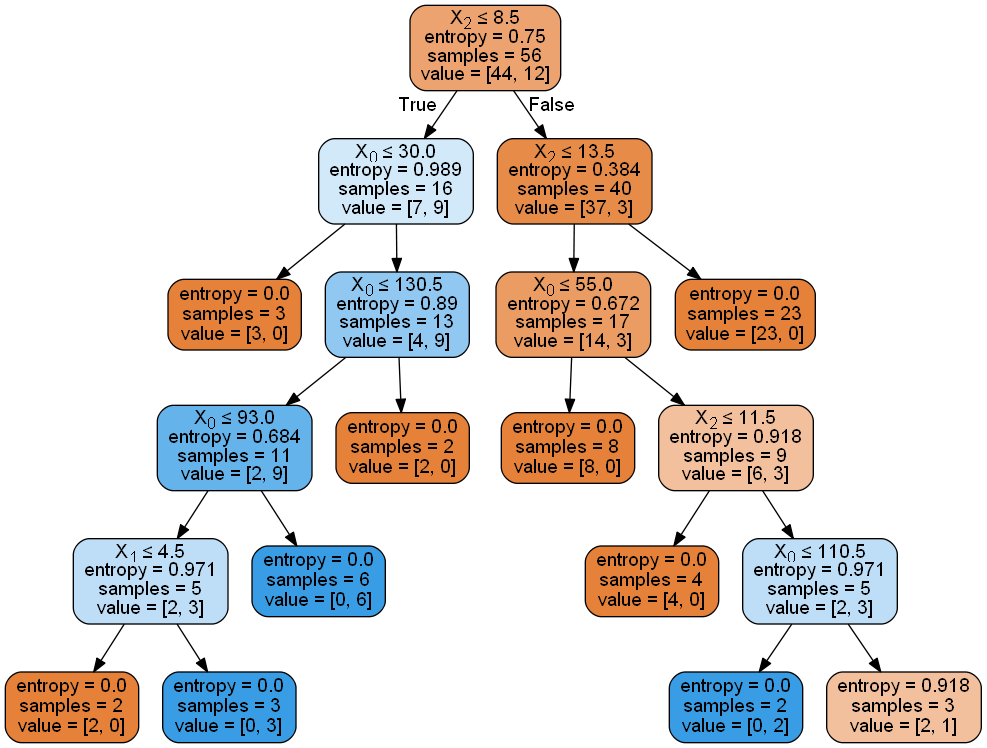

In [93]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())

In [94]:
dtree1 = DecisionTreeClassifier(max_depth = 1)

In [95]:
dtree1.fit(X_train,y_train, )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

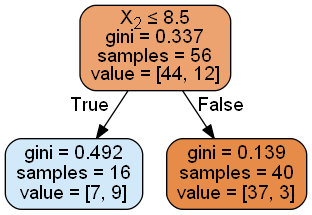

In [96]:
dot_data = StringIO()

export_graphviz(dtree1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())

## Random Forests

Now let's compare the decision tree model to a random forest.

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
rfc_pred = rfc.predict(X_test)

In [127]:
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [128]:
accuracy=accuracy_score(y_test,rfc_pred)
print(accuracy)

0.8


In [129]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 5  0]]


In [130]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.80      1.00      0.89        20
     present       0.00      0.00      0.00         5

   micro avg       0.80      0.80      0.80        25
   macro avg       0.40      0.50      0.44        25
weighted avg       0.64      0.80      0.71        25



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
